In [44]:
# Important statistical libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew, probplot
# Some graphing libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [45]:
# Import train dataset into dataframe
train = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/train.csv')
test = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/test.csv')

SalePrice's Skew: 1.8828757597682129; SalePrice's Kurtosis: 6.536281860064529


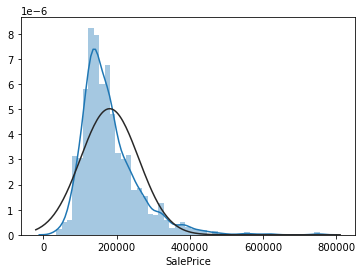

In [46]:
#Exploring Dependent Variables
#Testing the normality of SalePrice
sns.distplot(train.SalePrice,fit=norm)
print(f"SalePrice's Skew: {train.SalePrice.skew()}; SalePrice's Kurtosis: {train.SalePrice.kurt()}")

In [47]:
#Independent Variables-Data Type
#Categorical Variables vs Continuous Variables
#Numerical Variables vs Object Variables
ov = train.columns[train.dtypes == 'object']
nv = train.columns[train.dtypes != 'object']
num_var = pd.DataFrame(nv,columns=['num vars'])
obj_var = pd.DataFrame(ov,columns=['obj vars'])
num_var

,num vars
0,Id
1,MSSubClass
2,LotFrontage
3,LotArea
4,OverallQual
5,OverallCond
6,YearBuilt
7,YearRemodAdd
8,MasVnrArea
9,BsmtFinSF1


In [71]:
#Combining Variables
#Combine Bsmt Full Bathrooms with Bsmt Half Bathrooms
train['TotalBsmtBath'] = train['BsmtFullBath']+0.5*train['BsmtHalfBath']
#Combine Above Grade Full Bathrooms with Above Garde Half Bathrooms
train['TotalAGBath'] = train['FullBath'] + 0.5*train['HalfBath']
train['TotalBath'] = train['TotalAGBath'] + train['TotalBsmtBath']
#Calculate Hosue Age (YearSold - YearRemodAdd)
train['HouseAge'] = train['YrSold'] - train['YearRemodAdd']
#Total in house area sqft (garage? LowQualFinSF?)
train['TotalInHouseArea'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
#TotalPorchArea (wooddeck?)
train['TotalPorchArea'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train.drop('TotalPorch',axis=1)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,TotalBsmtBath,TotalAGBath,TotalBath,HouseAge,TotalInHouseArea,TotalPorchArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,1.0,2.5,3.5,5,2566,61
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,0.5,2.0,2.5,31,2524,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,1.0,2.5,3.5,6,2706,42
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,1.0,1.0,2.0,36,2473,307
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,1.0,2.5,3.5,8,3343,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,175000,0.0,2.5,2.5,7,2600,40
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,210000,1.0,2.0,3.0,22,3615,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,266500,0.0,2.0,2.0,4,3492,60
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,142125,1.0,1.0,2.0,14,2156,112


In [68]:
#Dividing All Independent Variables into three categories
non_num_vars = [
    'MSZoning', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
    'GarageType', 'MiscFeature', 
    'SaleType', 'SaleCondition'
]
rank_vars = [
    'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'Street', 'Alley',
    'LandSlope', 'Functional', 'GarageFinish', 'MoSold', 'YrSold', 'PavedDrive', 
    'CentralAir', 'LotShape', 'MSSubClass'
]
continuous_vars = [
    'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','TotalBsmtBath','TotalAGBath','TotalBath',
    'HouseAge','TotalInHouseArea','TotalPorch'
]
len(continuous_vars)

36

/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/a

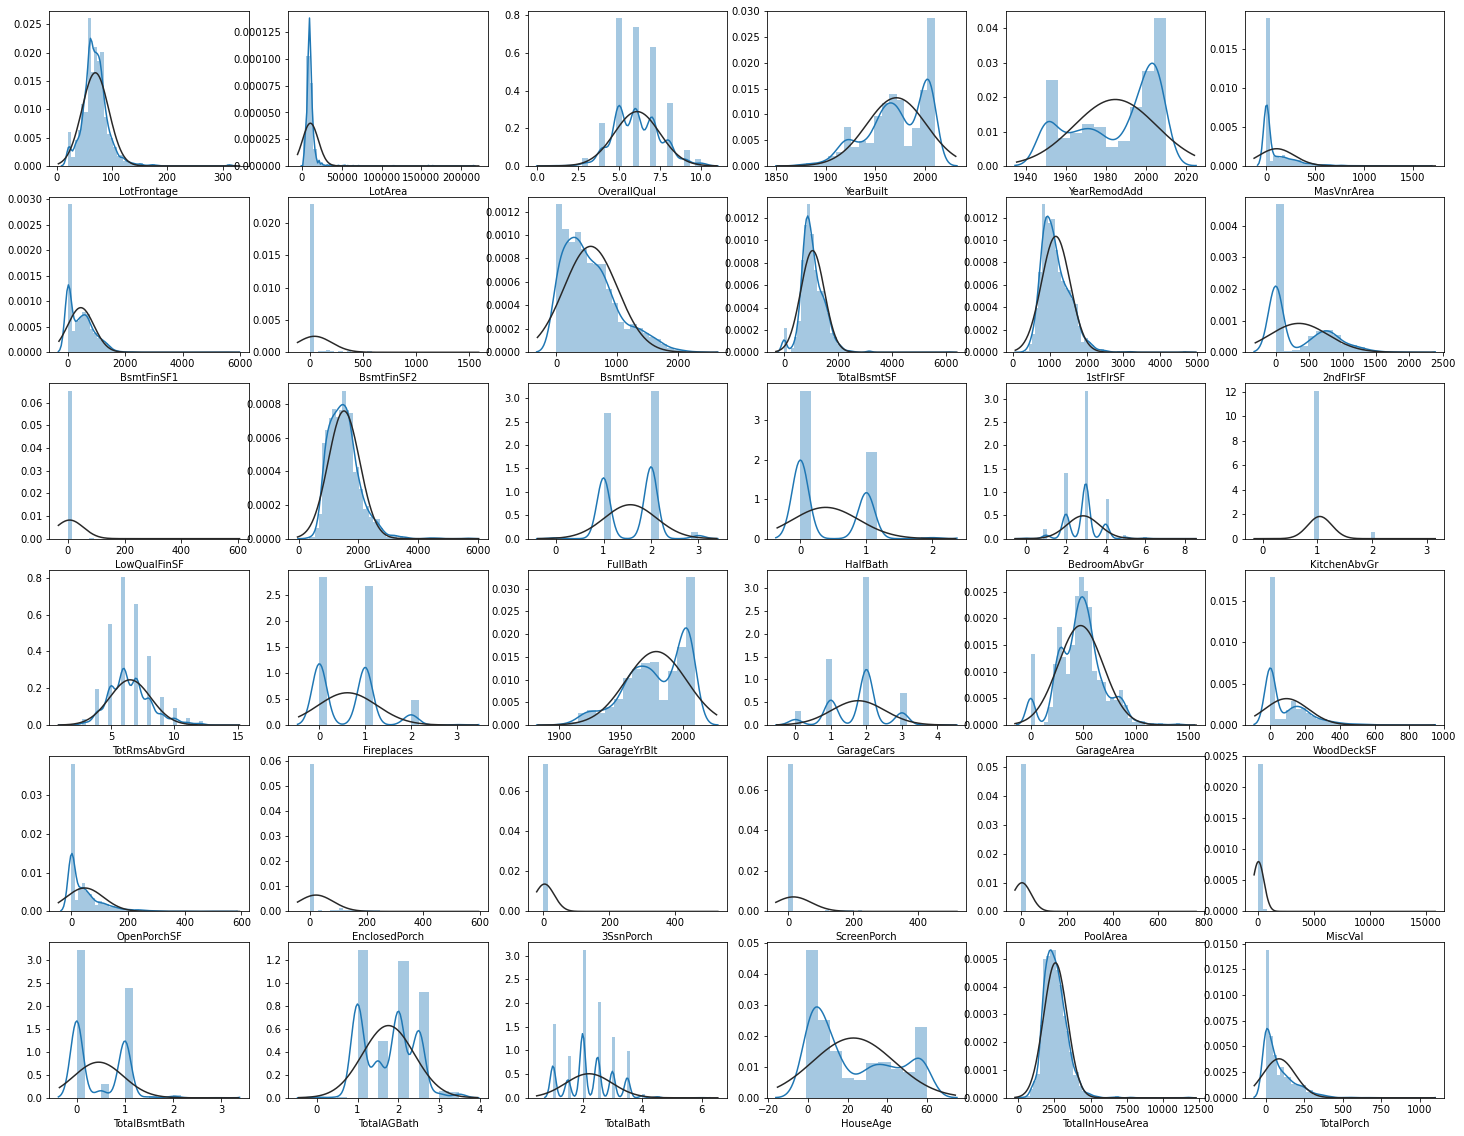

In [72]:
fig, ax = plt.subplots(6,6,figsize=(25,20))
for i,x in enumerate(continuous_vars):
    sns.distplot(train[x],fit=norm,ax=ax[i//6,i%6])

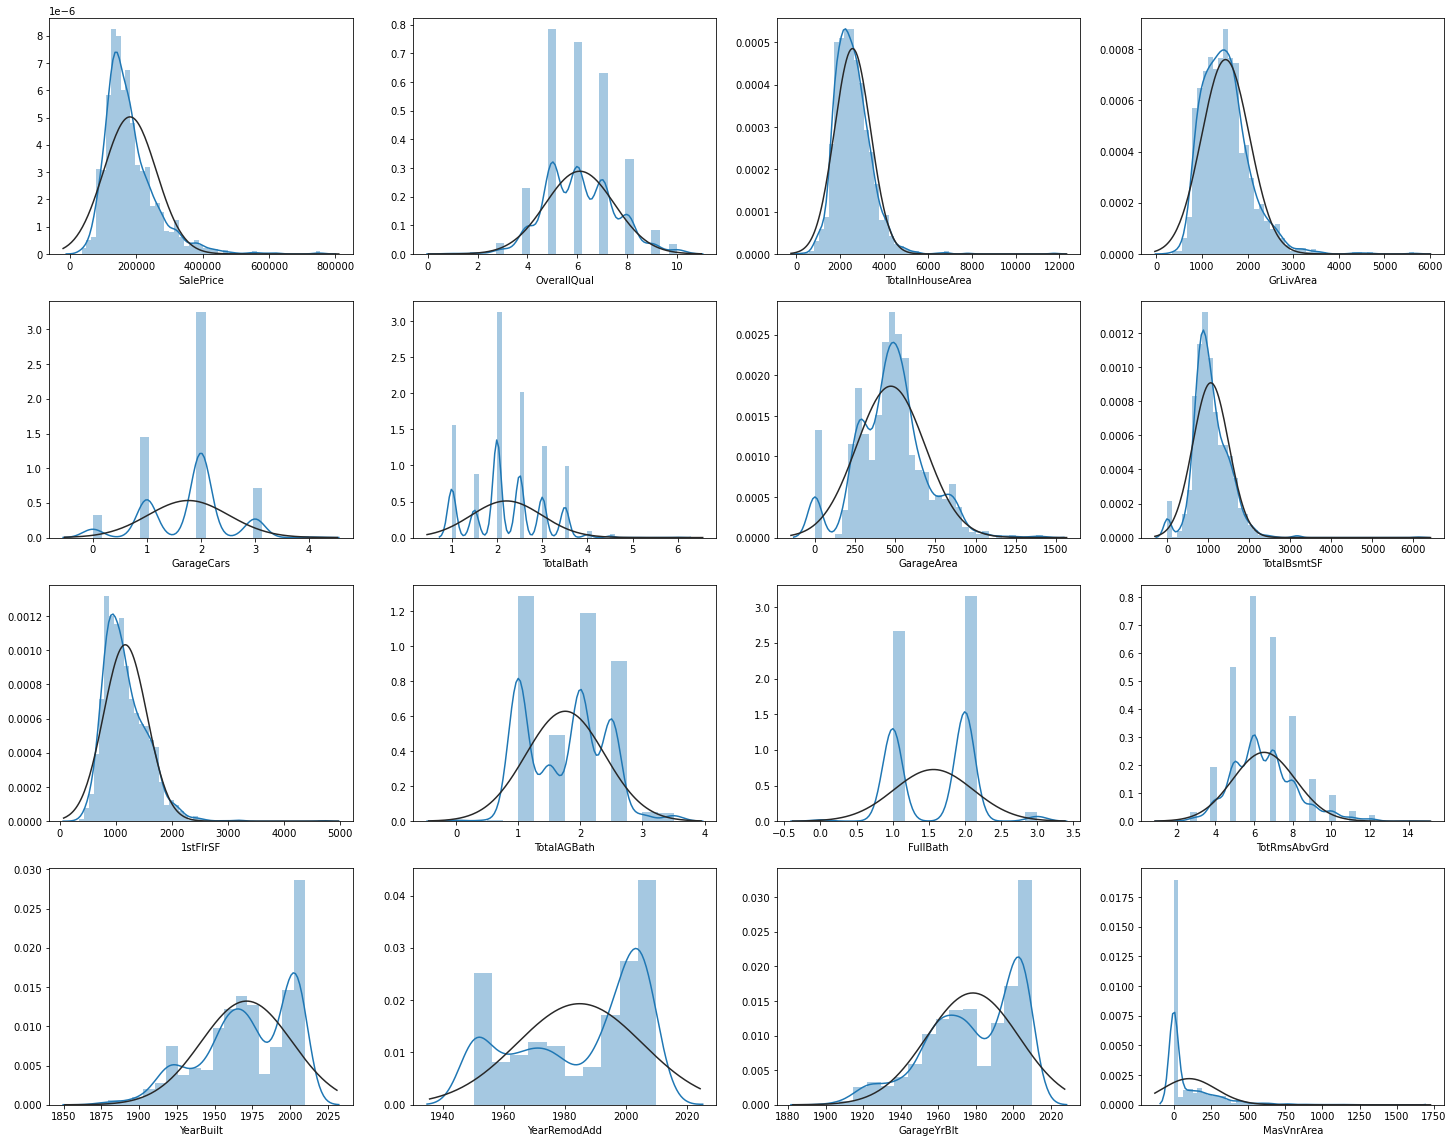

In [86]:
#Distplots of variabels with the highest corr
corrmat = train.corr()
variables = list(corrmat.nlargest(16,'SalePrice')['SalePrice'].index)
fig, ax = plt.subplots(4,4,figsize=(25,20))
for i,x in enumerate(variables):
    sns.distplot(train[x],fit=norm,ax=ax[i//4,i%4])